In [6]:
import google.generativeai as genai
import os
import yaml

In [7]:
yaml_file = open("exemplo.yaml", "r")
config = yaml.load(yaml_file, Loader=yaml.FullLoader)

genai.configure(api_key=os.environ["GEMINI_API"])
model = genai.GenerativeModel(config["aplicacao_individuos"]["llm_name"])
response = model.generate_content(config["aplicacao_individuos"]["prompt"])

In [8]:
print(response.text)

{"Mercury": [], "Venus": [], "Earth": ["Moon"], "Mars": ["Phobos", "Deimos"], "Jupiter": ["Metis", "Adrastea", "Amalthea", "Thebe", "Io", "Europa", "Ganymede", "Callisto", "Themisto", "Leda", "Ersa", "Himalia", "Lysithea", "Elara", "Dia", "Callirrhoe", "Sinope", "Euporie", "Eupheme", "Autonoe", "Thyone", "Harpalyke", "Iocaste", "Praxidike", "Megaclite", "Taygete", "Chaldene", "Cyllene", "Kore", "Herse", "Mneme", "Aoede", "Hegemone", "Pasithee", "Ananke", "Orthosie", "Eirene", "Isonoe", "Kale", "Pasiphae", "Carme", "Eukelade", "Kallichore", "Kalyke", "Erinome", "Arche", "Aitne", "Harpalyke", "Iocaste", "Praxidike", "Megaclite", "Taygete", "Chaldene", "Cyllene", "Kore", "Herse", "Mneme", "Aoede", "Hegemone", "Pasithee", "Ananke", "Orthosie", "Eirene", "Isonoe", "Kale", "Pasiphae", "Carme", "Eukelade", "Kallichore", "Kalyke", "Erinome", "Arche", "Aitne", "Valetudo"], "Saturn": ["Pan", "Atlas", "Prometheus", "Pandora", "Epimetheus", "Janus", "Mimas", "Enceladus", "Tethys", "Telesto", "Caly

In [ ]:
import json

response_json = json.loads(response.text)
response_json

{'Mercury': [],
 'Venus': [],
 'Earth': ['Moon'],
 'Mars': ['Phobos', 'Deimos'],
 'Jupiter': ['Metis',
  'Adrastea',
  'Amalthea',
  'Thebe',
  'Io',
  'Europa',
  'Ganymede',
  'Callisto',
  'Themisto',
  'Leda',
  'Ersa',
  'Himalia',
  'Lysithea',
  'Elara',
  'Dia',
  'Callirrhoe',
  'Sinope',
  'Euporie',
  'Eupheme',
  'Autonoe',
  'Thyone',
  'Harpalyke',
  'Iocaste',
  'Praxidike',
  'Megaclite',
  'Taygete',
  'Chaldene',
  'Cyllene',
  'Kore',
  'Herse',
  'Mneme',
  'Aoede',
  'Hegemone',
  'Pasithee',
  'Ananke',
  'Orthosie',
  'Eirene',
  'Isonoe',
  'Kale',
  'Pasiphae',
  'Carme',
  'Eukelade',
  'Kallichore',
  'Kalyke',
  'Erinome',
  'Arche',
  'Aitne',
  'Harpalyke',
  'Iocaste',
  'Praxidike',
  'Megaclite',
  'Taygete',
  'Chaldene',
  'Cyllene',
  'Kore',
  'Herse',
  'Mneme',
  'Aoede',
  'Hegemone',
  'Pasithee',
  'Ananke',
  'Orthosie',
  'Eirene',
  'Isonoe',
  'Kale',
  'Pasiphae',
  'Carme',
  'Eukelade',
  'Kallichore',
  'Kalyke',
  'Erinome',
  'Arche',

In [29]:
import pandas as pd

df = pd.read_json(json.dumps(response_json), orient="index")
df

C:\Users\rafae\AppData\Local\Temp\ipykernel_9684\2619086324.py:3: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(json.dumps(response_json), orient="index")


,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
Mercury,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Venus,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Earth,Moon,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Mars,Phobos,Deimos,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Jupiter,Metis,Adrastea,Amalthea,Thebe,Io,Europa,Ganymede,Callisto,Themisto,Leda,...,Kale,Pasiphae,Carme,Eukelade,Kallichore,Kalyke,Erinome,Arche,Aitne,Valetudo
Saturn,Pan,Atlas,Prometheus,Pandora,Epimetheus,Janus,Mimas,Enceladus,Tethys,Telesto,...,None,None,None,None,None,None,None,None,None,None
Uranus,Cordelia,Ophelia,Bianca,Cressida,Desdemona,Juliet,Portia,Rosalind,Cupid,Belinda,...,None,None,None,None,None,None,None,None,None,None
Neptune,Naiad,Thalassa,Despina,Galatea,Larissa,Proteus,Triton,Nereid,Halimede,Sao,...,None,None,None,None,None,None,None,None,None,None


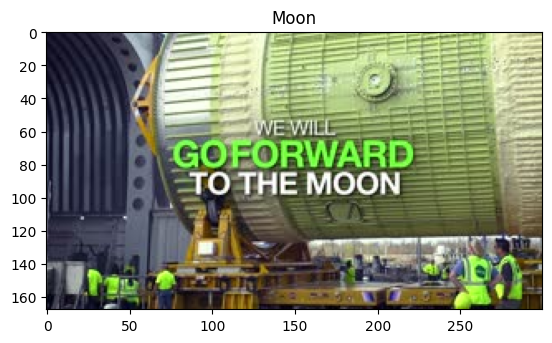

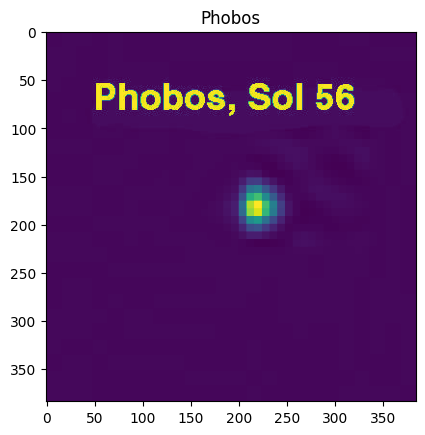

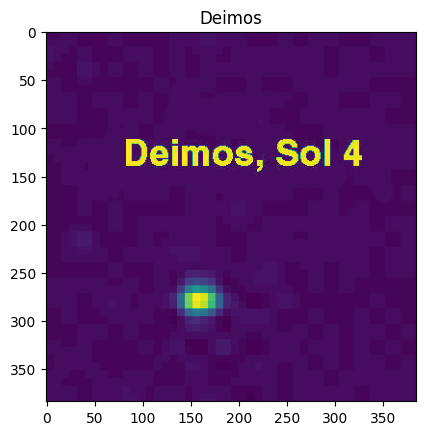

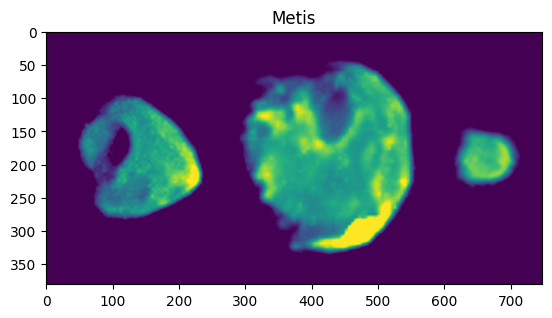

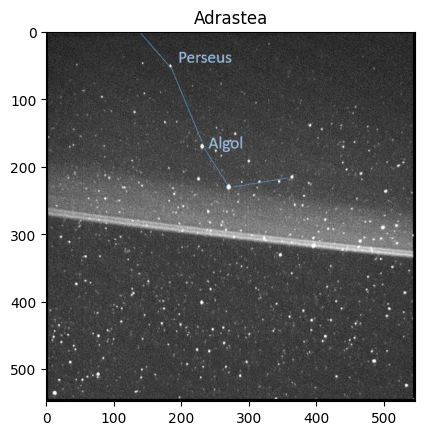

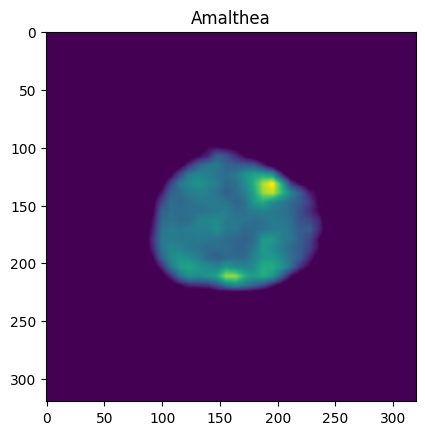

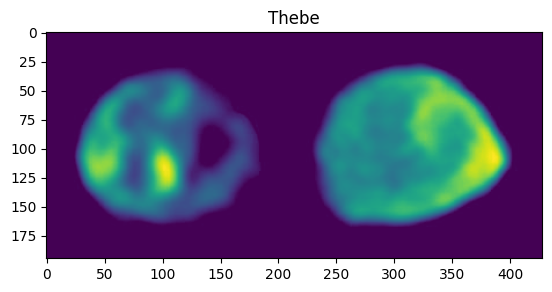

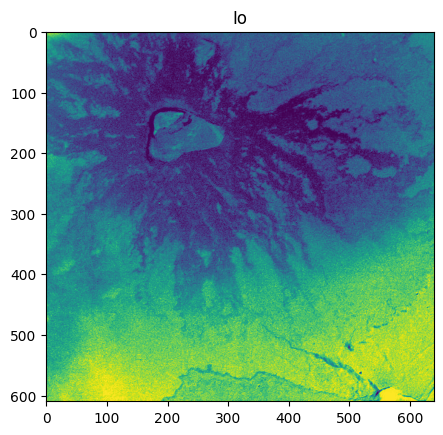

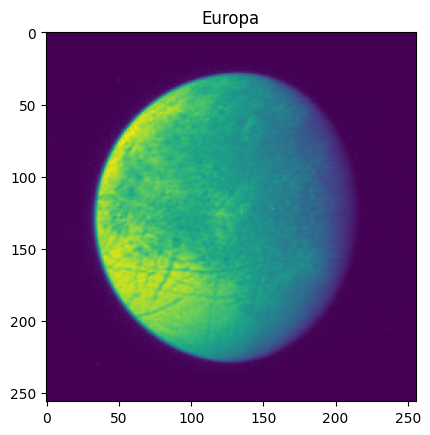

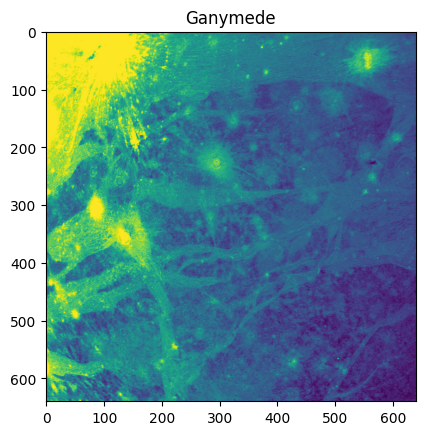

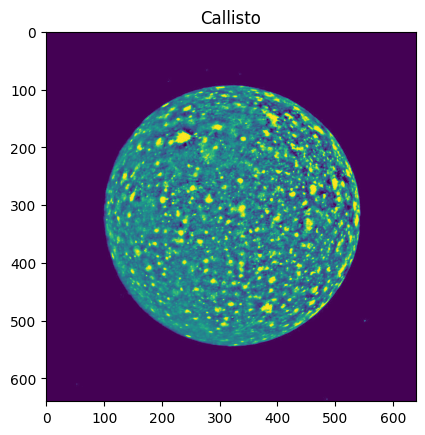

IndexError: list index out of range

In [11]:
# Use NASA API to get the image of each planet moon
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

def get_moon_image(moon_name):
    url = f"https://images-api.nasa.gov/search?q={moon_name}"
    response = requests.get(url)
    data = response.json()
    image_url = data["collection"]["items"][0]["links"][0]["href"]
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    return img

for planet in response_json.keys():
    for moon in response_json[planet]:
        img = get_moon_image(moon)
        plt.imshow(img)
        plt.title(moon)
        plt.show()